In [91]:
my_token = "1234" #update this with your own IBM token

# Install Necessary Libraries

In [77]:
!pip install qiskit
!pip install qiskit-Aer
!pip install qiskit-ibm-runtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.9 MB/s eta 0:00:00


# Import Libraries

In [159]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler, Estimator, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Designate the AerSimulator as the simulator

In [79]:
simulator = AerSimulator()

# Set the service for real runs with quantum computers

In [109]:
# service = QiskitRuntimeService()
# If you did not previously save your credentials, use the following line instead:
service = QiskitRuntimeService(channel="ibm_quantum", token=my_token)


# 1. Using Hadamard gates to place qubits into superposition.
This example will create a qubit, apply the Hadamard gate to put it into superposition, and measure the result

## Create a quantum circuit with one qubit

In [80]:
qc1 = QuantumCircuit(1)
qc1.h(0)  # Hadamard gate on qubit 0
qc1.measure_all()

You can visualize your circuit with the draw() method.

In [81]:
qc1.draw()

┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

## Run the simulations, and designate the number of measurements (shots)

### Expected Output:
The output will display a dictionary with the measurement counts and a histogram showing how often the qubit was measured in the |0⟩ state versus the |1⟩ state.

In [82]:
compiled_circuit = transpile(qc, simulator)
sim_result = simulator.run(compiled_circuit, shots=512).result()
counts = sim_result.get_counts()
print(counts)

{'11': 230, '00': 282}


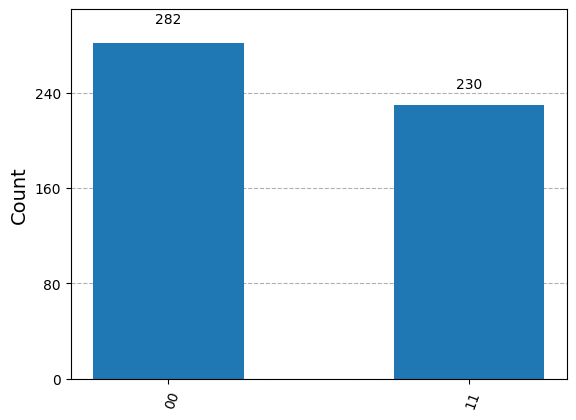

In [83]:
plot_histogram(counts)

# 2. Creating and Measuring Entanglement using the CNOT Gate
This example creates an entangled state using two qubits, applies a Hadamard gate on the first qubit and a CNOT gate between the two qubits, and then measures the results.

In [84]:
qc2 = QuantumCircuit(2)
qc2.h(0)  # Apply Hadamard gate to qubit 0 (put in superposition)
qc2.cx(0, 1)  # Apply CNOT gate (control qubit 0, target qubit 1)
qc2.measure_all()  # Measure both qubits
qc2.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [85]:
compiled_circuit = transpile(qc2, simulator)
entangled_sim_result = simulator.run(compiled_circuit, shots=512).result()
entangled_counts = entangled_sim_result.get_counts()
print(entangled_counts)

{'11': 252, '00': 260}


This shows that the qubits were either both measured as |00⟩ or |11⟩, demonstrating the entangled state. Note the absence of |01⟩ and |10⟩ states.

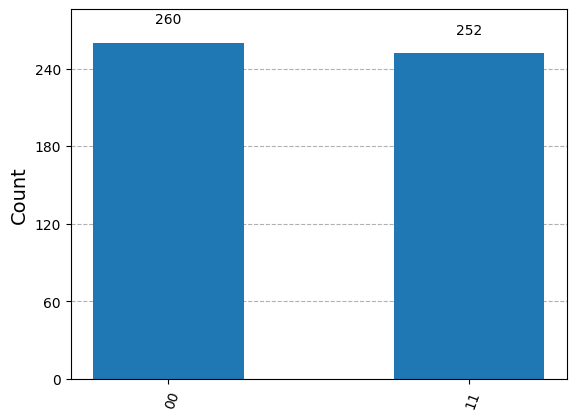

In [86]:
plot_histogram(entangled_counts)

# Run on a real quantum computer

In [231]:
backend = service.least_busy(2, operational=True)
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
transpiled_circuit = pm.run(qc2)
job_qc2 = backend.run(transpiled_circuit, shots=1024)
result_qc2 = job_qc2.result()
counts_qc2 = result_qc2.get_counts()
print(counts_qc2)

<ipython-input-231-e66d2b95f77e>:5: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  job_qc2 = backend.run(transpiled_circuit, shots=1024)


{'11': 505, '10': 6, '01': 19, '00': 494}


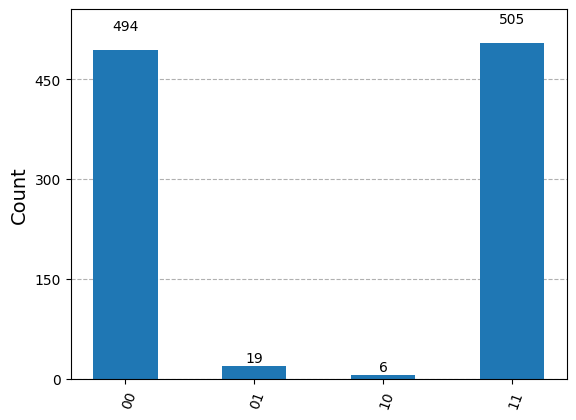

In [232]:
plot_histogram(counts_qc2)



We note that in actual quantum environments, the results are not deterministic.